In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('home_prices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


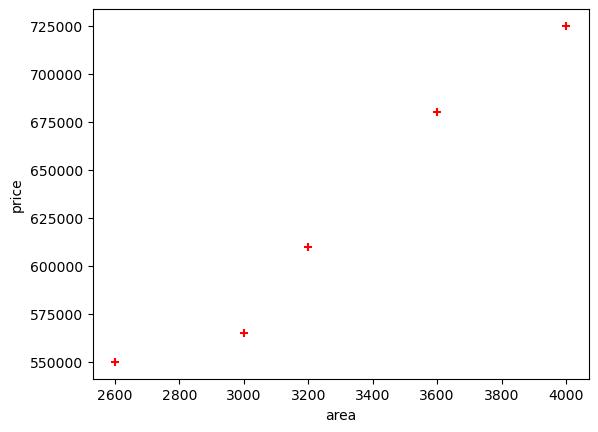

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
# reg = linear_model.LinearRegression()
# reg.fit(df[['area']],  df.price)

In [5]:
prices = df['price']
df.drop('price', axis=1, inplace=True)
df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
reg = linear_model.LinearRegression()
reg.fit(df,  prices)

p_prices = reg.predict(df)
p_prices

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [7]:
reg.score(df,  prices)

0.9584301138199486

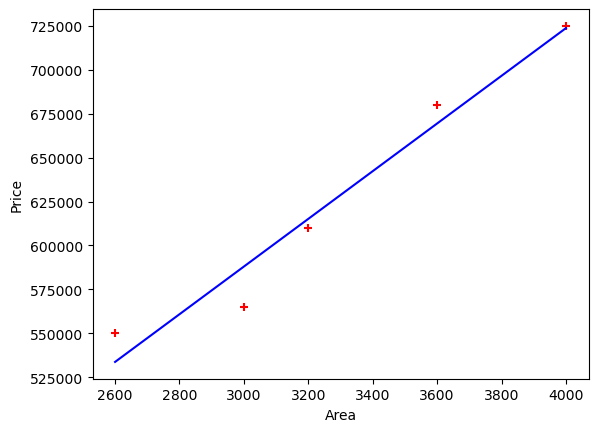

In [8]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, prices, color='red', marker='+')
plt.plot(df.area, p_prices, color='blue')

In [9]:
reg.predict([[3300]])

/Users/sasikiran/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [10]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

180616.43835616432

### Y = m * X + b (m is coefficient and b is intercept)

In [12]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [13]:
reg.predict([[5000]])

/Users/sasikiran/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [14]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [15]:
predict_prices = reg.predict(area_df)
predict_prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
area_df['predicted_prices'] = predict_prices
area_df

,area,predicted_prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
area_df.to_csv('predicted_house_prices.csv', index=False)